In [15]:
import random as rd

INF = 10000000

def generate_matrix(n, min_weight, max_weight):
    return [[rd.randint(min_weight, max_weight) for x in range(n)] for y in range(n)] 

In [16]:
import graphviz

def draw_graph(graph,n):
    #dot = graphviz.Digraph(comment='Nada')
    dot = graphviz.Digraph(comment='')
    for i in range(n):
        for j in range(n):
            weight = graph[i][j]
            if weight != None and weight != 0: 
                dot.edge(str(i), str(j), label=str(weight))
    dot.graph_attr['rankdir'] = 'BT'
    return dot


In [50]:
import heap
import numpy

def setup_aux_graph(table, graph, n):
    for i in range(n):
        table[0][i] = 0

    for i in range(n):
        for j in range(n):
            table[i+1][j+1] = graph[i][j]


def bellman_ford(graph, n):
    # Without path_table
    distances = [INF for i in range(n)] 
    distances[0] = 0 

    for k in range(n):
        for i in range(n):
            for j in range(n):
                if graph[i][j] != None and distances[i] + graph[i][j] < distances[j]:
                    distances[j] = distances[i] + graph[i][j]

    for i in range(n):
        for j in range(n):
            if graph[i][j] != None  and distances[i] + graph[i][j] < distances[j]:
                return None

    return distances



def disjktra_util(graph, actual_vertex, priority_queue, done):
    if priority_queue.heap_size == 0:
        return 

    for index, vertex in enumerate(priority_queue.get_heap()):
        edge = graph[actual_vertex[0]][vertex[0]]

        # If three is an edge betwenn the actual_vertex and the vertex from the heap
        if edge != None:
            new_cost = actual_vertex[2] + edge  
            if new_cost < vertex[2]:
                vertex[2] = new_cost
                vertex[1] = actual_vertex[0] 

    #After modify the heap, heapifu it again
    priority_queue.heapify()

    top_element = priority_queue.extract()
    top_element[3] = True

    #Put the done vertex in this array
    done.append(top_element)

    return disjktra_util(graph, top_element, priority_queue, done)


def disjktra(graph, source, n):
    done = []
    priority_queue = heap.Heap(lambda a,b:(a[2] < b[2]),False)

    # index, last_vertex, accumulated_vertex, visited
    priority_queue.insert([source, None, 0, True])
    done.append([source, None, 0, True])

    for i in range(n):
        if source != i:
            priority_queue.insert([i, None, INF, False])
    
    disjktra_util(graph, priority_queue.extract() , priority_queue, done)
    return done
    

def reweight(graph, distance, n):
     for i in range(n):
        for j in range(n):
            if graph[i][j] != None:
                graph[i][j] = graph[i][j]+distance[i]-distance[j]


def johnson(graph, n):
    aux_graph = [[None for x in range(n+1)] for y in range(n+1)] 

    # i = 0 -> aux_graph[i] = [0,0,0,0,0,...]
    setup_aux_graph(aux_graph, graph, n)
    aux_distance = bellman_ford(aux_graph,n+1)

    if aux_distance == None:
        return None

    #Delete the i[0] node
    del aux_graph[0]
    for i in range(n):
        del aux_graph[i][0]
    del aux_distance[0]

    reweight(aux_graph,aux_distance,n)

    results = []
    for i in range(n):
        aux = disjktra(aux_graph,i,n)

        for j in range(n):
            # Original distance -> accumulated_cost(u,v) = accumulated_cost(u,v) + bellman_ford_distance[v] - ellman_ford_distance[u] 
            aux[j][2] = aux[j][2] + aux_distance[aux[j][0]] - aux_distance[i]

        results.append(aux)

    return results

[[0, None, 0, True], [3, 0, 1, True], [2, 0, -5, True], [1, 2, -11, True]]
[[1, None, 0, True], [2, 1, 6, True], [3, None, 10000012, True], [0, None, 10000011, True]]
[[2, None, 0, True], [1, 2, -6, True], [3, None, 10000006, True], [0, None, 10000005, True]]
[[3, None, 0, True], [2, 3, -6, True], [1, 2, -12, True], [0, 3, 8, True]]


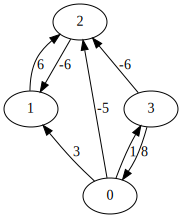

In [51]:
graph = [[0,3,-5,1],
         [None,0,6,None], 
         [None,-6,0,None],
         [8,None,-6,0]]

results = johnson(graph, 4)

if results != None:
    for i in results:
        print(i)
        
draw_graph(graph,4)
